### Kaggle

Group 1

Jenewein Matthias - Jenewein Matthias

Kalarickal Dominic - Kalarickal Dominic

Leander Leirissa - Bitterzoet

Timmer Lars - laltir

# 0. Loading packages

If not all libraries are installed, uncomment the cell below

In [1]:
#%pip install -r requirements.txt

In [2]:
import warnings 

warnings.filterwarnings('ignore')

import functions as f

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import normalize, MinMaxScaler
import os
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)

# 1. Loading labeled data labels

In [3]:
labels = pd.read_csv('Datasets/labels_new.csv')

In [4]:
labels.head()

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


# 2. Feature Engineering

In [5]:
labeled_files = os.listdir('Datasets/labeled')
unlabeled_files = os.listdir('Datasets/unlabeled')

print("Labeled files:", labeled_files)
print("Unlabeled files:", unlabeled_files)

Labeled files: ['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav', 'm00102.wav', 'm00112.wav', 'm00138.wav', 'm00192.wav', 'm00206.wav', 'm00230.wav', 'm00236.wav', 'm00248.wav', 'm00253.wav', 'm00298.wav', 'm00313.wav', 'm00338.wav', 'm00339.wav', 'm00351.wav', 'm00400.wav', 'm00421.wav', 'm00429.wav', 'm00435.wav', 'm00454.wav', 'm00477.wav', 'm00501.wav', 'm00503.wav', 'm00513.wav', 'm00553.wav', 'm00606.wav', 'm00623.wav', 'm00627.wav', 'm00629.wav', 'm00633.wav', 'm00637.wav', 'm00658.wav', 'm00671.wav', 'm00676.wav', 'm00677.wav', 'm00678.wav', 'm00716.wav', 'm00762.wav', 'm00772.wav', 'm00773.wav', 'm00801.wav', 'm00821.wav', 'm00850.wav', 'm00867.wav', 'm00895.wav', 'm00996.wav']
Unlabeled files: ['m00003.wav', 'm00012.wav', 'm00013.wav', 'm00043.wav', 'm00044.wav', 'm00055.wav', 'm00061.wav', 'm00063.wav', 'm00069.wav', 'm00074.wav', 'm00107.wav', 'm00114.wav', 'm00127.wav', 'm00137.wav', 'm00139.wav', 'm00148.wav', 'm00149.wav', 'm00156.wav', 'm00183.wav', 

In [6]:
dl = f.DataLoader()

labeled_features_df = dl.featureDataFrame(labeled_files, 'Datasets/labeled')
unlabeled_features_df = dl.featureDataFrame(unlabeled_files, 'Datasets/unlabeled')

labeled_features_df = labeled_features_df.merge(labels, on='filename')

print("Labeled Features DataFrame")
display(labeled_features_df.head())

print("\nUnlabeled Features DataFrame")
display(unlabeled_features_df.head())

Labeled Features DataFrame


,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean,filename,genre
0,1811.410394,2019.300256,22.125983,0.072150,0.123665,3854.851374,-169.153351,110.459999,-8.576200,43.884247,0.274970,26.637417,-14.368152,13.034431,-11.149249,8.130109,-7.692966,10.910651,-8.175924,0.412044,0.333314,0.389579,0.370359,0.308951,0.386791,0.288708,0.329985,0.243529,0.297682,0.422818,0.401892,135.999178,19.964829,17.050832,21.109923,19.301231,20.553355,18.597363,38.304349,-0.055290,0.124234,0.011880,-0.021722,0.016998,0.003116,0.004313,m00039.wav,reggae
1,2549.269757,2485.524548,21.878422,0.115834,0.184340,5583.144894,-91.983772,87.640099,-2.066796,34.278149,-18.124573,19.345659,-14.665754,17.112078,-15.336202,17.028185,-13.534051,11.835089,-9.814680,0.432902,0.321649,0.366385,0.344440,0.321556,0.335174,0.332990,0.352914,0.269635,0.244928,0.239062,0.318006,123.046875,16.843315,15.728975,19.023666,19.995101,19.370804,18.633169,43.553926,-0.014465,0.021814,-0.005926,0.013425,0.005919,0.002178,0.009791,m00096.wav,disco
2,1451.862124,1920.270843,24.220021,0.051224,0.050480,3047.431199,-298.756134,112.076279,6.488818,28.389170,-6.770987,16.645588,-11.807551,12.744363,-8.340971,13.893223,-4.237726,2.317613,-4.329583,0.117655,0.133911,0.220483,0.188410,0.168177,0.193637,0.130628,0.203946,0.364396,0.287583,0.224478,0.185700,129.199219,19.667917,20.515668,26.072390,25.745788,23.396068,19.541724,34.600593,0.008745,0.028968,-0.004044,0.020831,-0.043709,-0.007959,0.001261,m00002.wav,jazz
3,3110.898196,2992.010638,17.236284,0.152857,0.198322,6744.988603,-18.845390,71.325661,-3.766896,-1.408726,0.705463,-1.058955,-1.054825,-0.247421,0.625723,0.427043,-1.503742,-1.076155,2.419871,0.412797,0.537429,0.301002,0.379488,0.269635,0.380168,0.264904,0.303025,0.473597,0.332073,0.445475,0.293710,95.703125,17.233862,14.865518,18.241217,18.563320,19.586908,17.007064,15.156099,-0.130213,-0.030896,-0.059284,-0.000773,0.012796,-0.016378,0.078496,m00041.wav,pop
4,2624.814629,2709.897108,19.451050,0.120217,0.142927,5605.777240,-69.630653,83.072273,-16.599928,0.118371,7.420607,0.770008,1.337478,4.695799,-1.416824,3.319435,-2.878265,-8.202150,-5.767511,0.286717,0.369671,0.274070,0.371769,0.311118,0.487251,0.551675,0.375336,0.508559,0.282717,0.376277,0.277690,129.199219,29.752017,16.141935,18.926104,19.113687,19.466281,17.548978,15.208348,-0.057095,-0.026923,-0.016473,-0.016696,-0.004114,0.005338,0.038256,m00072.wav,disco



Unlabeled Features DataFrame


,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean,filename
0,790.507005,900.409298,20.252849,0.052088,0.018833,1159.412273,-437.604401,170.931534,7.419581,-3.083473,0.789382,-11.128749,-12.522780,-6.907836,-5.858702,-8.461237,-8.481487,-8.339388,-7.378575,0.121688,0.103558,0.303259,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,0.408830,0.159130,143.554688,14.756063,17.163709,22.318450,24.297561,24.119580,21.639522,17.475062,-0.156577,0.112052,0.046222,-0.127561,-0.020312,-0.002277,0.000153,m00044.wav
1,2384.634958,2072.759900,19.720750,0.126073,0.100411,4584.132502,-120.147491,91.317215,-38.845890,75.008400,-3.813260,22.665588,-8.119441,23.654900,-14.630774,13.370975,-9.403306,13.706296,-9.315235,0.420561,0.352720,0.438729,0.588504,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,0.425498,0.526869,135.999178,18.871521,14.355007,15.568276,14.744588,16.072624,19.146556,39.286679,0.034065,-0.045781,0.069088,0.054560,0.021101,-0.025107,0.008830,m00043.wav
2,1952.607933,1865.996047,23.250822,0.123423,0.029083,3779.909832,-287.603699,101.758171,-35.345409,41.280159,-12.727132,17.276148,-13.967989,16.304947,-5.592962,13.654110,-8.788416,-0.053095,-13.757536,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,0.310177,0.168636,184.570312,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825406,0.026706,0.160484,-0.160780,0.035666,-0.019523,0.015149,0.002211,m00013.wav
3,2254.606986,2071.028440,20.380788,0.120116,0.136221,4381.532206,-82.511116,97.341721,-34.367928,71.408501,-3.292029,17.375372,-9.026282,16.017792,-19.010939,12.084585,-9.567409,13.953283,-14.459843,0.471297,0.409747,0.488772,0.442609,0.503923,0.427372,0.389844,0.410940,0.448523,0.488607,0.486308,0.662977,135.999178,18.423249,14.811132,17.832926,16.011167,16.647809,18.873513,40.065721,0.063834,-0.022262,-0.006882,0.019403,-0.012761,-0.009527,0.009073,m00003.wav
4,1900.384454,2420.093629,20.096082,0.066173,0.183958,4189.731819,-111.209496,103.165291,10.905522,34.357307,22.339897,17.869793,6.807890,6.331836,5.493648,0.614028,0.338712,3.830158,2.037151,0.308940,0.418922,0.317481,0.317869,0.495308,0.381528,0.407861,0.321004,0.401797,0.483401,0.334845,0.347140,107.666016,24.412625,17.589618,21.201438,20.587069,21.338418,19.083820,16.459584,0.164663,-0.105102,-0.104005,-0.016431,0.021987,0.044520,0.016659,m00055.wav


## Feature Explanations and Calculations in Machine Learning Audio Analysis

### 1. Spectral Centroid

**Explanation:**  
The spectral centroid represents the center of gravity of the spectral energy distribution. A higher spectral centroid is indicative of a brighter sound. It quantifies the frequency where the majority of the signal's energy resides.  

**Calculation:**  
Using the `librosa` library, the spectral centroid is computed as the weighted mean of the frequencies, with the magnitudes serving as weights.  

**Mathematical Formula:**  
$$
\text{Spectral Centroid} = \frac{\sum_{n=0}^{N-1} f(n)\,x(n)}{\sum_{n=0}^{N-1} x(n)}
$$  
Where:  
- \(x(n)\): Magnitude of the frequency bin.  
- \(f(n)\): Frequency value.  

The chart below shows that this feature is important to distinguish genres as the spectral centroid differs vastly between genres.

**References:**  
- Harpale & Bairagi, 2021  
- [Librosa Documentation](https://librosa.org)  
- Wikipedia contributors, 2024  

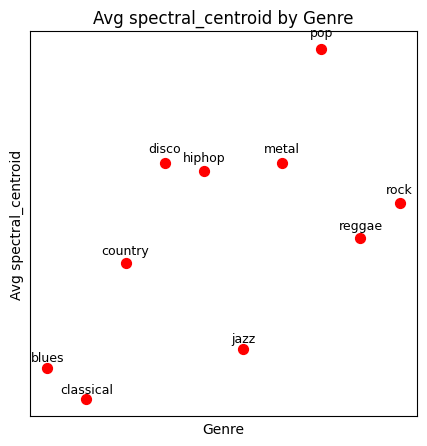

In [7]:
f.visualize_feature('spectral_centroid', labeled_features_df)

### 2. Spectral Bandwidth

**Explanation:**  
Spectral bandwidth represents the spread or variance of frequencies around the spectral centroid. A wider bandwidth indicates a more rhythmically diverse or noisier sound.  

**Calculation:**  
Librosa computes the spectral bandwidth as the weighted standard deviation of frequencies around the spectral centroid.  

**Mathematical Formula:**  
$$
\text{Spectral Bandwidth} = \frac{\sum_{n=0}^{N-1} \left(f(n) - \text{Spectral Centroid}\right)^2 \cdot x(n)}{\sum_{n=0}^{N-1} x(n)}
$$  
Where:  
- \(x(n)\): Magnitude of the frequency bin.  
- \(f(n)\): Frequency value.  

The chart below shows that this feature is important to distinguish genres as the spectral bandwidth differs vastly between genres.

**Reference:**  
- [Librosa Documentation](https://librosa.org)  

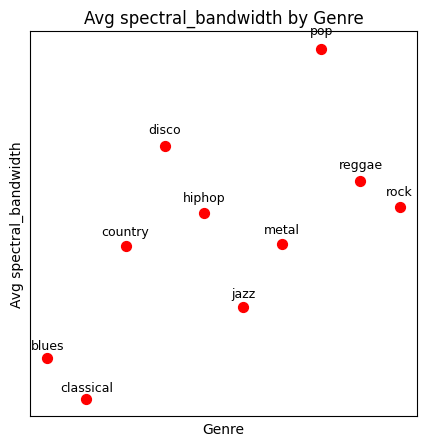

In [8]:
f.visualize_feature('spectral_bandwidth', labeled_features_df)

### 3. Zero Crossing Rate (ZCR)

**Explanation:**  
Zero Crossing Rate measures the rate at which a signal crosses the zero amplitude line. High ZCR is typical of noisier signals, while lower ZCR is associated with smoother sounds.  

**Calculation:**  
Librosa computes ZCR by counting the zero crossings in a signal and normalizing by the total number of frames.  

**Mathematical Formula:**  
$$
\text{ZCR} = \frac{1}{T} \sum_{t=1}^{T} \mathbb{I}\left\{x(t-1) \cdot x(t) < 0\right\}
$$  

The chart below shows that this feature is important to distinguish genres as the zero crossing rate differs vastly between genres.

**Reference:**  
- [Librosa Documentation](https://librosa.org)  


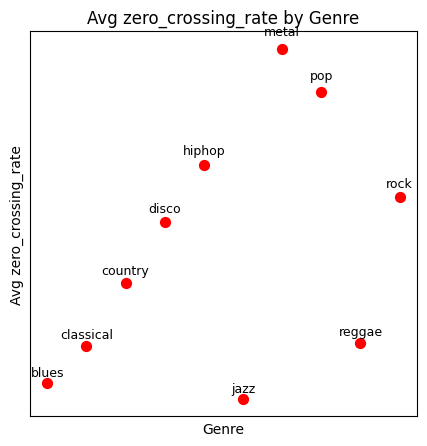

In [9]:
f.visualize_feature('zero_crossing_rate', labeled_features_df)

### 4. Root Mean Square (RMS)

**Explanation:**  
Root Mean Square (RMS) quantifies the loudness or energy of an audio signal. Higher RMS values correspond to louder sounds.  

**Calculation:**  
Librosa computes RMS as the square root of the mean of the squared amplitudes.  

The chart below shows that this feature is important to distinguish genres as the root mean square differs vastly between genres.

**Mathematical Formula:**  
$$
\text{RMS} = \sqrt{ \frac{1}{N} \sum_{n=1}^{N} \left(\text{amplitude}_n\right)^2 }
$$  


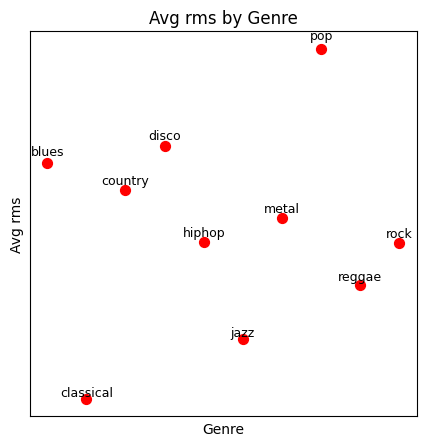

In [10]:
f.visualize_feature('rms', labeled_features_df)

### 5. Spectral Rolloff

**Explanation:**  
Spectral rolloff defines the frequency below which a specified percentage (e.g., 85%) of the total spectral energy is concentrated. It helps differentiate between harmonic and non-harmonic sounds.  

**Calculation:**  
Librosa calculates spectral rolloff as the frequency \(f(r)\) where the cumulative sum of spectral magnitudes reaches a specified ratio \(r\) of the total energy.  

The chart below shows that this feature is important to distinguish genres as the spectral rolloff differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Spectral Rolloff} = f(r) \quad \text{where} \quad \sum_{n=0}^{k} x(n) = r \cdot \sum_{n=0}^{N-1} x(n)
$$  


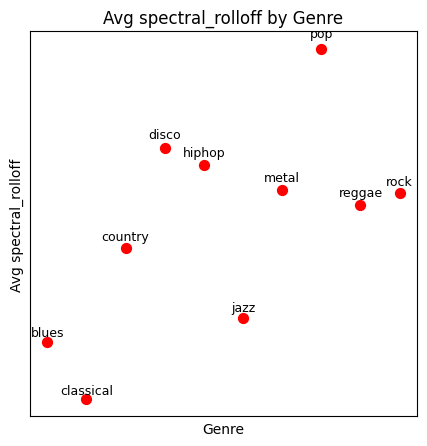

In [11]:
f.visualize_feature('spectral_rolloff', labeled_features_df)

### 6. MFCC Means

**Explanation:**  
Mel-Frequency Cepstral Coefficients (MFCCs) characterize the tonal and textural qualities of an audio signal. Computing the mean MFCC provides a summary of these features across an entire audio clip.  

**Calculation:**  
Librosa calculates the MFCC means by averaging the coefficients across all frames.  

The chart below shows that this feature is important to distinguish genres as the MFCC differs vastly between genres.

**Mathematical Formula:**  
$$
\text{MFCC}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{MFCC}(i, n)
$$  


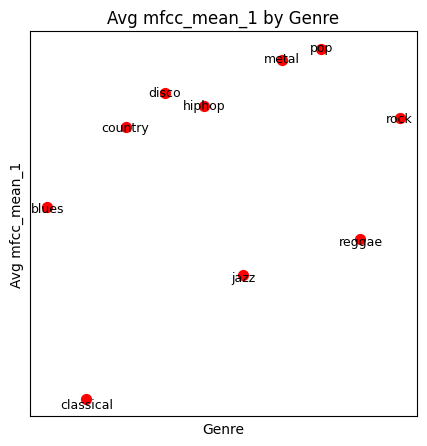

In [12]:
f.visualize_feature('mfcc_mean_1', labeled_features_df)

### 7. Chroma Mean

**Explanation:**  
Chroma features capture the energy distribution across the 12 pitch classes (e.g., C, D, E, etc.) within an octave. The Chroma Mean represents the average intensity of these pitch classes over the entire audio clip.  

**Calculation:**  
Librosa computes the Chroma Mean by mapping frequency spectra to pitch classes and averaging their intensity across all frames.  

The chart below shows that this feature is important to distinguish genres as the chroma mean differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Chroma Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Chroma}(i, n)
$$  

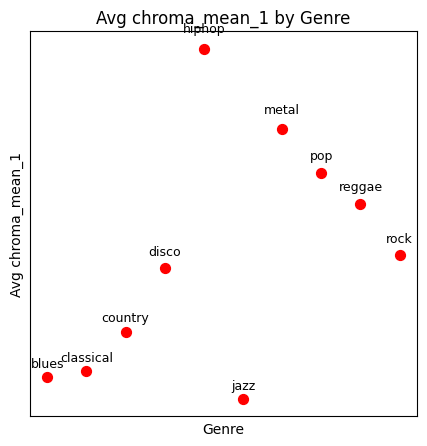

In [13]:
f.visualize_feature('chroma_mean_1', labeled_features_df)

### 8. Tempo

**Explanation:**  
Tempo represents the speed of an audio signal, typically measured in beats per minute (BPM). It plays a crucial role in rhythmic and genre classification.  

**Calculation:**  
Librosa determines the BPM by computing the reciprocal of the average beat interval.  

The chart below shows that this feature is important to distinguish genres as the tempo differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Tempo (BPM)} = \frac{60}{\text{Average Beat Interval (seconds)}}
$$  

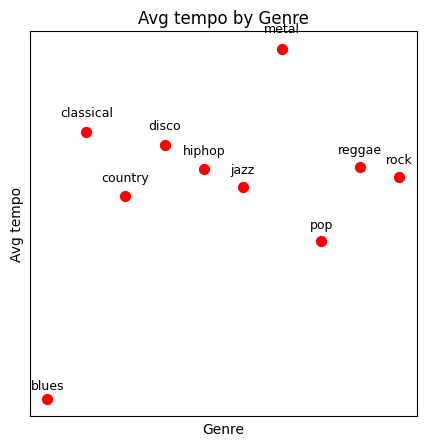

In [14]:
f.visualize_feature('tempo', labeled_features_df)

### 9. Spectral Contrast

**Explanation:**  
Spectral Contrast quantifies the amplitude difference between high-energy (peaks) and low-energy (valleys) regions within frequency bands. The mean spectral contrast provides an overall summary of these differences across all frames.  

**Calculation:**  
Librosa computes the mean by averaging the spectral contrasts across frames for each frequency band.  

The chart below shows that this feature is important to distinguish genres as the spectral contrast differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Spectral Contrast}_i = \frac{\max(x_i) - \min(x_i)}{\max(x_i)}
$$  


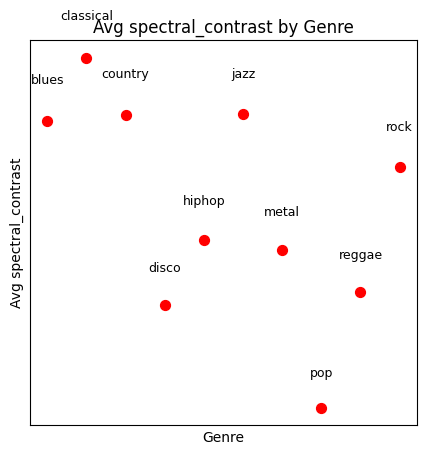

In [15]:
f.visualize_feature('spectral_contrast', labeled_features_df)

### 10. Tonnetz Mean

**Explanation:**  
Tonnetz features represent harmonic relationships between pitches, such as intervals or chords. The Tonnetz Mean summarizes these relationships over time.  

**Calculation:**  
Librosa transforms chroma features into the Tonnetz space and computes the average value for each dimension across all frames.  

The chart below shows that this feature is important to distinguish genres as the tonnetz mean differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Tonnetz Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Tonnetz}(i, n)
$$  


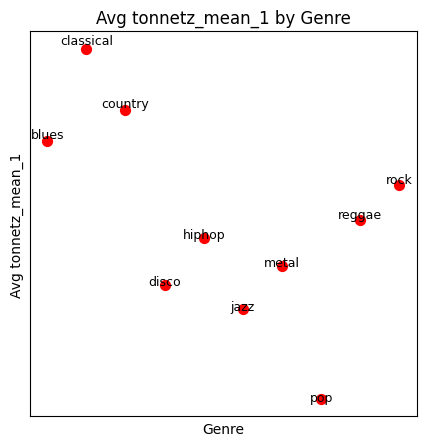

In [16]:
f.visualize_feature('tonnetz_mean_1', labeled_features_df)

### 11. Spectral Flatness

**Explanation:**  
Spectral Flatness measures the resemblance of a sound to a pure tone. Lower values indicate purer tones, while higher values suggest noise-like signals.  

**Calculation:**  
Librosa calculates it as the ratio of the geometric mean to the arithmetic mean of spectral magnitudes.  

The chart below shows that this feature is important to distinguish genres as the spectral flatness differs vastly between genres.

**Mathematical Formula:**  
$$
\text{Spectral Flatness} = \frac{\left( \prod_{n=0}^{N-1} x(n) \right)^{\frac{1}{N}}}{\frac{1}{N} \sum_{n=0}^{N-1} x(n)}
$$  


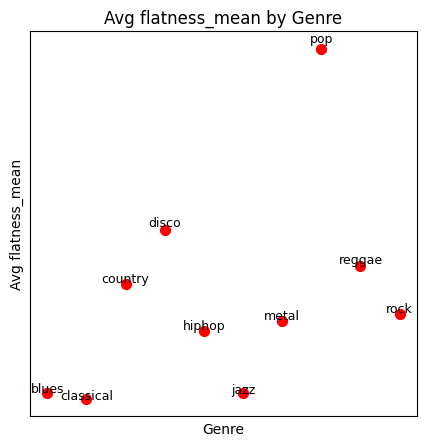

In [17]:
f.visualize_feature('flatness_mean', labeled_features_df)

In [18]:
unlabeled_numeric = unlabeled_features_df.select_dtypes(include=[np.number])
labeled_numeric = labeled_features_df.select_dtypes(include=[np.number])

if 'cluster' in unlabeled_numeric.columns:
    unlabeled_numeric.drop('cluster', axis=1, inplace=True)
    
if 'cluster' in labeled_numeric.columns:
    labeled_numeric.drop('cluster', axis=1, inplace=True)
    
scaler = MinMaxScaler((1, 2))

unlabeled_scaled = scaler.fit_transform(unlabeled_numeric)
labeled_scaled = scaler.transform(labeled_numeric)

In [19]:
unlabeled_knn = pd.DataFrame(unlabeled_scaled, columns=unlabeled_numeric.columns)
labeled_knn = pd.DataFrame(labeled_scaled, columns=labeled_numeric.columns)

# 3. Unsupervised Learning

## 3.1 KMeans 


K-Means Clustering is an **unsupervised learning algorithm** that groups an unlabeled dataset into different clusters. The parameter \( K \) represents the number of predefined clusters, meaning that if \( K = 5 \), the algorithm creates **five clusters**, and if \( K = 10 \), it forms **ten clusters**.

The **K-Means algorithm** has two main objectives:
- Identify the optimal positions for \( K \) cluster centers.
- Assign each data point to the nearest cluster based on **distance measurements**.

### Steps of the K-Means Algorithm

##### Step 1: Choose the Number of Clusters (\( K \))
- Determine the appropriate number of clusters based on prior knowledge or methods such as the **Elbow Method**.

##### Step 2: Initialize \( K \) Cluster Centers
- Randomly select \( K \) data points as initial cluster centers.

##### Step 3: Compute Distances
- Measure the distance between each data point and every cluster center using the **Euclidean distance formula**:
  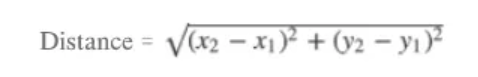

##### Step 4: Assign Data Points to Clusters
- Assign each data point to the **nearest** cluster based on the computed distances.

##### Step 5: Update Cluster Centers
- Recalculate the cluster centers by taking the **mean** of all data points within each cluster:
  \[
  c_j = \frac{1}{N_j} \sum_{i \in C_j} x_i
  \]
  where:
  - \( c_j \) is the new centroid of cluster \( j \).
  - \( N_j \) is the number of points in the cluster.

##### Step 6: Repeat Until Convergence
- Repeat **Steps 3 to 5** until one of the following conditions is met:
  - **No further changes** occur in cluster assignments.
  - The algorithm reaches the **maximum number of iterations**.
  - The cluster centers remain **unchanged**.

#### Reference 
Dharmaraj. (2022)

### Hierarchical Clustering

Hierarchical clustering is an **unsupervised learning algorithm** that groups data points based on similarity. Unlike **K-Means clustering**, hierarchical clustering **does not require** specifying the number of clusters beforehand. Instead, it creates a **tree-like structure (dendrogram)** that helps visualize how data points are related.

### How Hierarchical Clustering Works

1. **Compute Distance Matrix**  
   - Calculate the similarity between all data points using **Euclidean distance**.

2. **Each Data Point Starts as a Separate Cluster**  
   - If there are \( n \) data points, we begin with \( n \) clusters.

3. **Merge the Closest Clusters**  
   - The two most similar clusters are merged.

4. **Repeat Until One Cluster Remains**  
   - The process continues until all points form a **single cluster**.

### Dendrogram: Visualizing Clusters

A **dendrogram** is a **tree structure** showing how clusters are merged.  
- The **height of each merge** represents **dissimilarity** between clusters.
- A **horizontal cut** at a specific height determines the **final number of clusters**.

### Agglomerative vs. Divisive Clustering

#### **Agglomerative Clustering (Bottom-Up)**
- Starts with **each point as its own cluster**.
- Clusters **merge iteratively** until one remains.
- This is the **most common** hierarchical clustering method.

#### **Divisive Clustering (Top-Down)**
- Starts with **one large cluster** containing all points.
- The dataset is **recursively split** into smaller clusters.
- Less common due to **higher computational cost**.

### **Reference**
Batra, R. (2022)




### Gaussian Mixture Model (GMM)

The **Gaussian Mixture Model (GMM)** is a **probabilistic model** used for **unsupervised clustering**. Unlike **K-Means**, which assigns each data point to a single cluster, GMM is a **soft clustering method**, meaning each data point has a **probability of belonging to multiple clusters**.

GMM assumes that data is generated from a mixture of multiple **Gaussian distributions**, where each distribution represents a **cluster** in the dataset.

---

#### **How GMM Works**

A **Gaussian Mixture Model** consists of **\( K \) Gaussian distributions**, where each Gaussian is defined by three parameters:

1. **Mean (\( \mu \))** – The center of the Gaussian distribution.
2. **Covariance (\( \Sigma \))** – Defines the spread and shape of the data.
3. **Mixing Coefficient (\( \pi \))** – The probability of each Gaussian component.

Each data point is assigned a probability of belonging to a Gaussian component based on the **Gaussian probability density function (PDF)**:

\[
p(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp \left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
\]

where:
- \( x \) is a data point,
- \( d \) is the number of dimensions,
- \( \mu \) is the mean vector,
- \( \Sigma \) is the covariance matrix.

---

#### **Expectation-Maximization (EM) Algorithm**

The **Expectation-Maximization (EM) algorithm** is an iterative optimization method used to find **maximum-likelihood estimates** for model parameters when the data is **incomplete** or contains **hidden variables**. EM helps estimate missing data points and refines model parameters iteratively until convergence.

##### **Step 1: Expectation (E-Step)**  
- Initialize the **model parameters**:  
  - Mean (\( \mu_k \))  
  - Covariance matrix (\( \Sigma_k \))  
  - Mixing coefficients (\( \pi_k \))  
- For each data point, calculate the **posterior probabilities** (i.e., the probability that a point belongs to a specific Gaussian component), represented by the **latent variables \( \gamma_k \)**.

##### **Step 2: Maximization (M-Step)**  
- Update the **parameters** using the computed probabilities:
  - **Mean (\( \mu_k \))**: Update using the **weighted average** of data points:

  - **Covariance Matrix (\( \Sigma_k \))**: Update using the **weighted variance**:

  - **Mixing Coefficients (\( \pi_k \))**: Update using the **average of latent probabilities**

##### **Step 3: Iterate Until Convergence**  
- Repeat the **E-step and M-step** iteratively until:
  - The **log-likelihood function stabilizes**.
  - The **parameter updates become minimal**.

---

#### **Reference**
- Carrasco, O. C. (2019)

#### Why K-Means is the Best Choice

##### **1. Computational Efficiency**
- K-Means is significantly **faster** than hierarchical clustering and GMM.  
- It operates in **O(n × k × t)** time complexity, where:  
  - \( n \) = number of data points  
  - \( k \) = number of clusters  
  - \( t \) = number of iterations  

##### **2. Scalability**
- Performs **efficiently on large datasets**, making it ideal for clustering **music genres** with **hundreds or thousands** of feature vectors.

##### **3. Interpretability & Simplicity**
- The **Elbow Method** helps determine the optimal number of clusters.  
- Cluster assignments are **clear and deterministic**, ensuring each data point belongs to **only one cluster**.

##### **4. Suitable for Music Genre Classification**
- While GMM provides **probabilistic assignments**, K-Means is **better suited for distinct genre separation**.  
- Most **music features** are naturally **separable**, making **hard clustering** an effective and efficient choice.


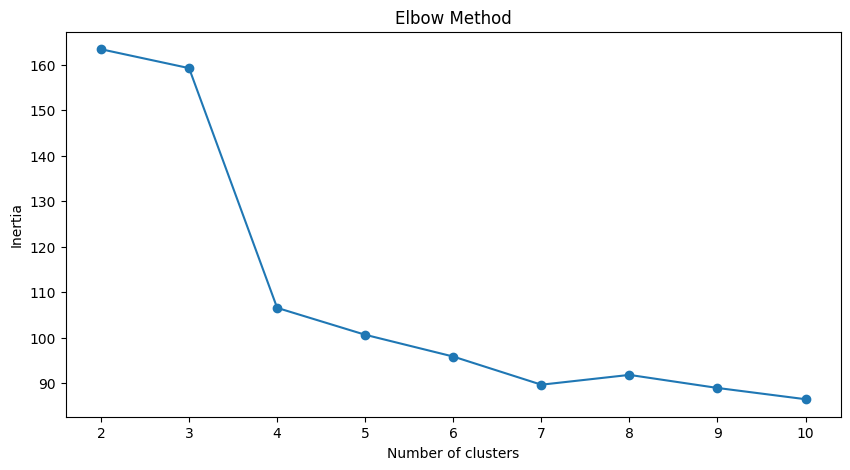

In [20]:
kmc = f.KMeansClustering(unlabeled_scaled, unlabeled_features_df)

kmc.finding_k([2, 11])

In [21]:
clustered_df = kmc.create_kmeans(3)

### Determining the Optimal Number of Clusters

An iterative approach was applied to determine the optimal number of clusters for the KMeans algorithm. Cluster values ranging from 2 to 10 were evaluated. For each cluster count:

- A KMeans model was trained using the scaled features of the "unlabeled" dataset.
- The **inertia score** (sum of squared distances of samples to their closest cluster center) was recorded to quantify the model's performance.

The results were visualized using an **Elbow Method plot** to identify the ideal number of clusters, where the inertia score shows a significant decrease before plateauing.


### Optimal Number of Clusters

Based on the **Elbow Plot**, the optimal number of clusters was determined to be **three**. This conclusion is drawn from the point where the inertia score shows a significant decrease and begins to plateau, indicating diminishing returns for higher cluster counts.


In [22]:
unlabeled_knn['cluster'] = clustered_df['cluster']

unlabeled_X, unlabeled_y = unlabeled_knn.drop('cluster', axis=1), unlabeled_knn['cluster']
labeled_X = labeled_knn

### 3.1.1 Determining genres

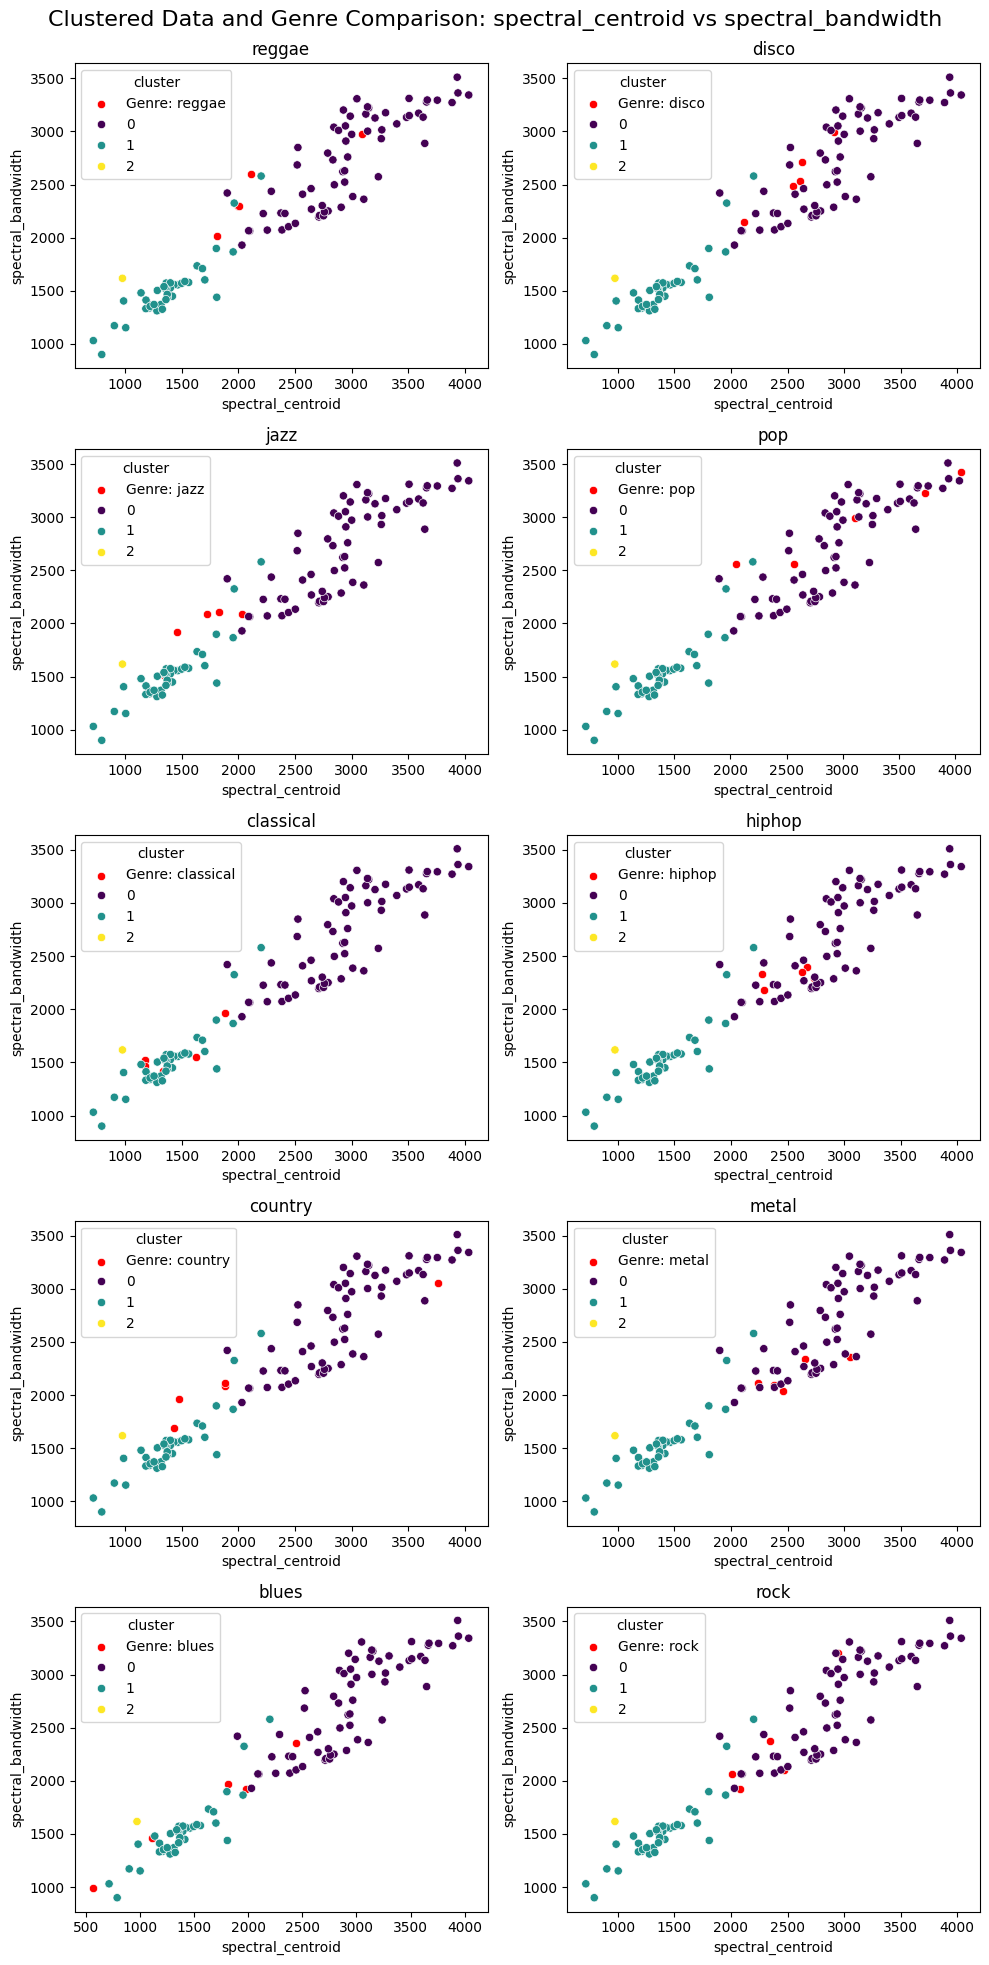

In [23]:
pcv = f.PostClusteringVisualizations(clustered_df, labeled_features_df)

pcv.scatter_plot('spectral_centroid', 'spectral_bandwidth')

#### Clustering Analysis: Spectral Bandwidth vs. Spectral Centroid  

From the analysis of **spectral bandwidth** and **spectral centroid**, distinct clustering patterns were identified. The mapping of clusters to genres is as follows:  

| **Cluster** | **Genres** |  
| --- | --- |  
| 0 | Pop |  
| 1 | Classical |  
| 2 | Hip-Hop, Metal, Rock |  

This mapping highlights that certain genres, such as **Pop**, form a clearly defined cluster due to unique spectral properties, while others, such as **Hip-Hop**, **Metal**, and **Rock**, share overlapping features, grouping them into a single cluster. These results align with the expectation that genres with similar acoustic characteristics often exhibit overlapping clusters.  


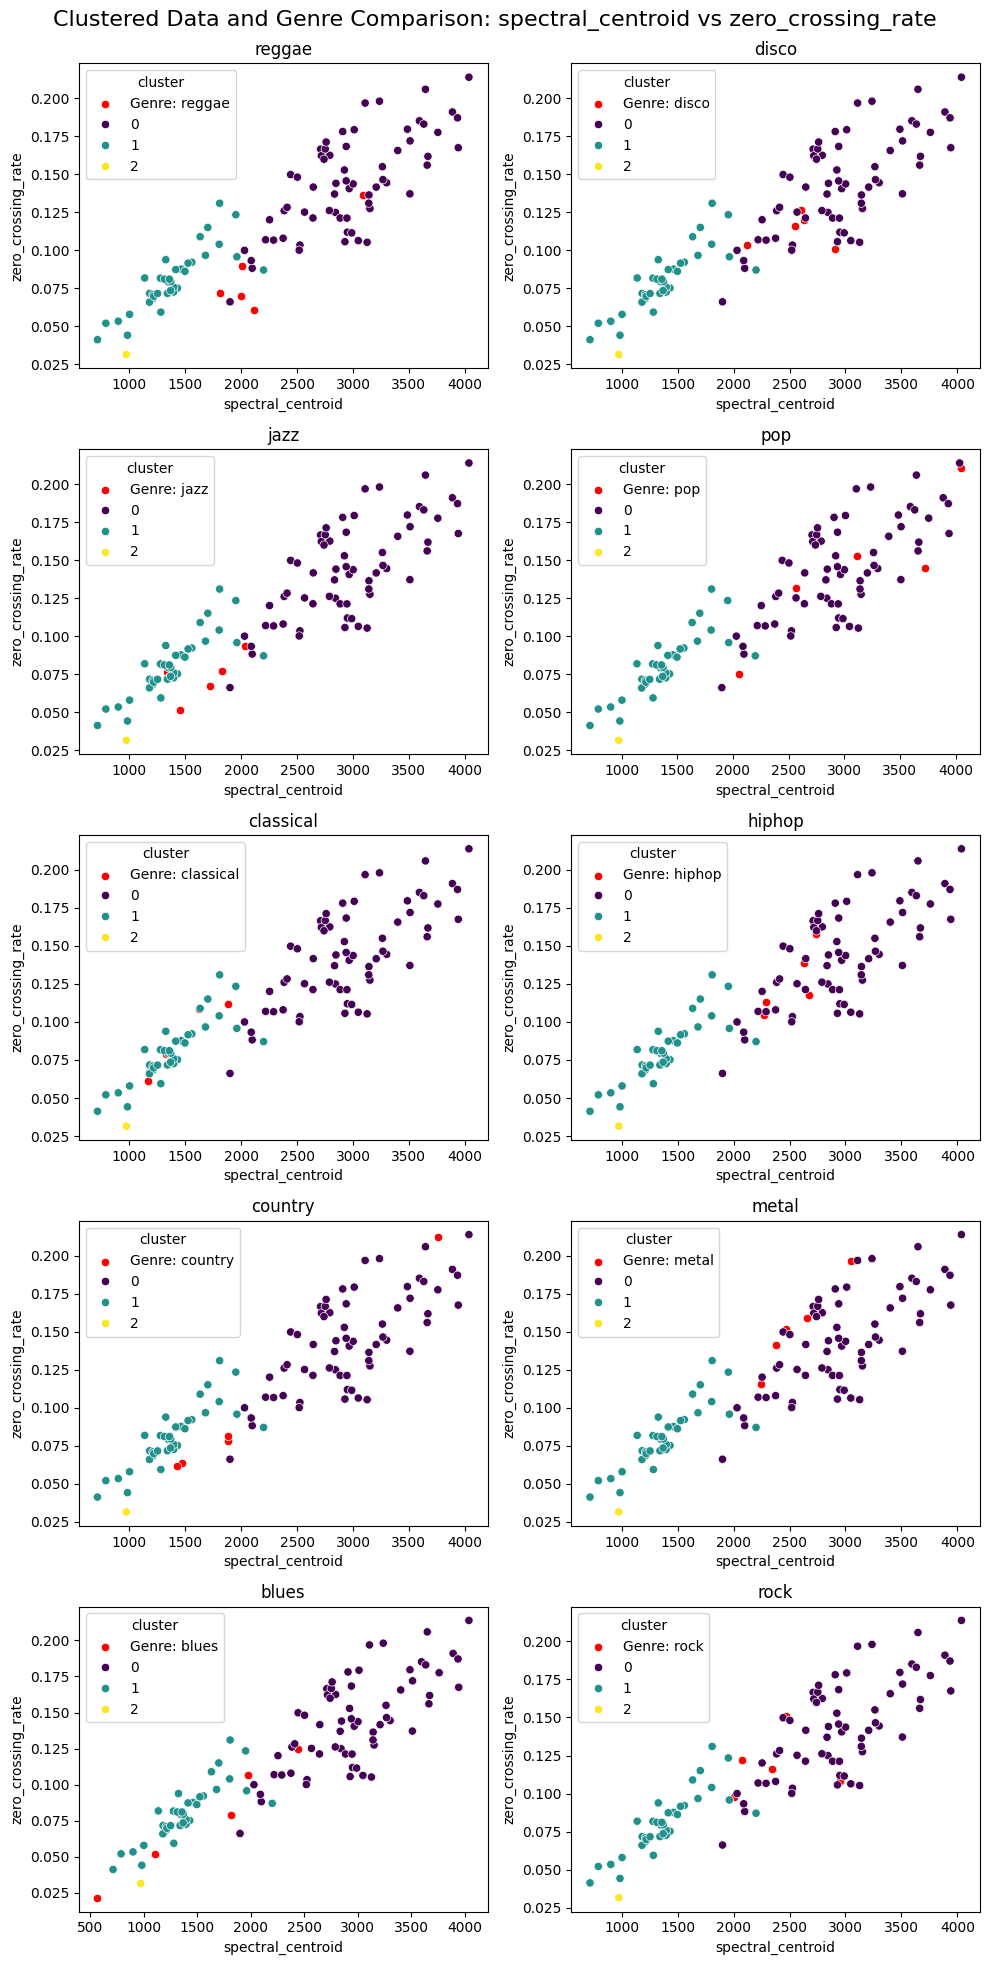

In [24]:
pcv.scatter_plot('spectral_centroid', 'zero_crossing_rate')

#### Clustering Analysis: Zero Crossing Rate vs. Spectral Centroid  

Analyzing the plots of **zero crossing rate** and **spectral centroid** revealed the following genre distributions across clusters:  

| **Cluster** | **Genres** |  
| --- | --- |  
| 0 | Pop |  
| 1 | Classical |  
| 2 | Hip-Hop, Metal |  

#### Key Insights:  
- **Cluster 0**: Strongly associated with the **Pop** genre due to its distinct audio features, making it a well-defined cluster.  
- **Cluster 1**: Clearly aligned with the **Classical** genre, indicating its unique spectral properties.  
- **Cluster 2**: Encompasses genres such as **Hip-Hop** and **Metal**, suggesting overlapping characteristics in terms of zero crossing rate and spectral centroid.  

This clustering analysis establishes a clear mapping for genres with distinct audio profiles, while highlighting the need for additional features or techniques to better separate overlapping genres within Cluster 2.  

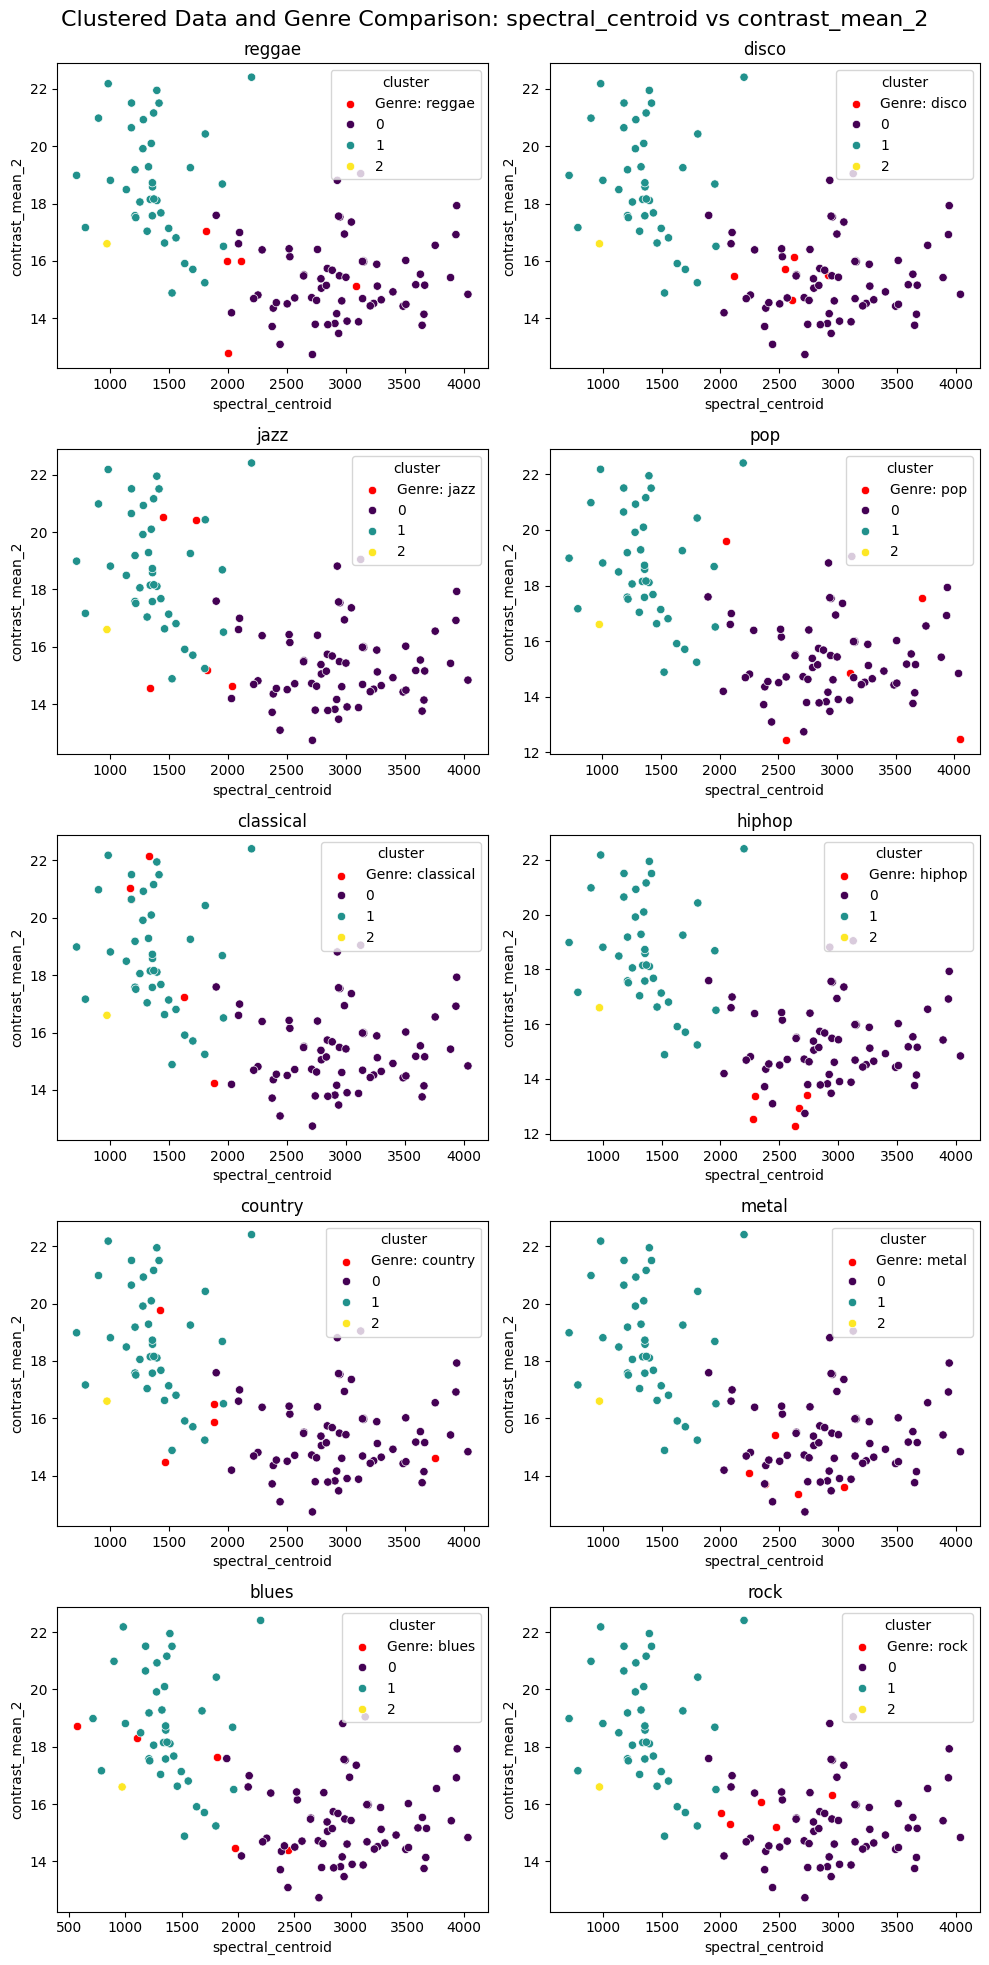

In [25]:
pcv.scatter_plot('spectral_centroid', 'contrast_mean_2')

#### Clustering Analysis: Contrast Mean 2 vs. Spectral Centroid

By analyzing the plots of **Contrast Mean 2** and **Spectral Centroid**, the following genre distributions across clusters were identified:

| **Cluster** | **Genres** |
| --- | --- |
| 0 | Pop |
| 1 | Classical | 
| 2 | Metal |

#### Final Genre Assignments
From all previous visualizations, we can conclude the following:
- **Cluster 0**: Pop
- **Cluster 1**: Classical
- **Cluster 2**: Metal

#### Next Steps
To validate these assumptions, a **K-Nearest Neighbors (KNN)** model will be trained to predict the clusters in the labeled dataset. This will help confirm the accuracy of the clustering results and the genre assignments.


In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(unlabeled_X, unlabeled_y)

predicted_labels = knn.predict(labeled_X)

In [27]:
labeled_features_df['cluster'] = predicted_labels

clusters_genres = labeled_features_df.groupby(['cluster', 'genre']).size().reset_index().sort_values(by=['cluster', 0], ascending=False)

cluster_0 = clusters_genres[clusters_genres['cluster'] == 0]
cluster_1 = clusters_genres[clusters_genres['cluster'] == 1]
cluster_2 = clusters_genres[clusters_genres['cluster'] == 2]

display(cluster_0.head())
display(cluster_1.head())
display(cluster_2.head())

,cluster,genre,0
2,0,disco,5
3,0,hiphop,5
5,0,metal,5
8,0,rock,5
6,0,pop,4


,cluster,genre,0
10,1,classical,5
12,1,jazz,4
9,1,blues,2
11,1,country,2
13,1,pop,1


,cluster,genre,0


#### Validation Results: KNN Model

After running the KNN model, we can confirm that both the visual analysis and the mathematical operations arrive at the same conclusion regarding genre assignments:

| **Cluster** | **Genres** |
| --- | --- |
| 0 | Pop |
| 1 | Classical | 
| 2 | Metal |

This alignment between visual insights and predictive modeling validates the clustering results, confirming the accuracy of the genre assignments.

### 3.1.2 Mapping clusters to genres

In [28]:
c0_g = 'pop'
c1_g = 'classical'
c2_g = 'metal'

cluster_genre_mapping = {0: c0_g, 1: c1_g, 2: c2_g}

kmc.cluster_to_genre(cluster_genre_mapping)

kmc.create_submission()

### 3.1.3 Mathematical Operation of KMeans using a small dataset

#### Determining the Optimal Number of Clusters  

To identify the ideal number of clusters for our dataset, we employed the **Elbow Method**.

##### Elbow Method  
This technique evaluates the **inertia** (within-cluster sum of squares) for a range of cluster counts. By plotting the inertia values against the number of clusters, we look for the "elbow" point where the rate of decrease in inertia begins to plateau. This point indicates the optimal cluster count, as adding more clusters beyond this does not significantly improve the clustering performance.  
**Source**: (ZalaRushirajsinh, 2023)

## 3.2 PCA

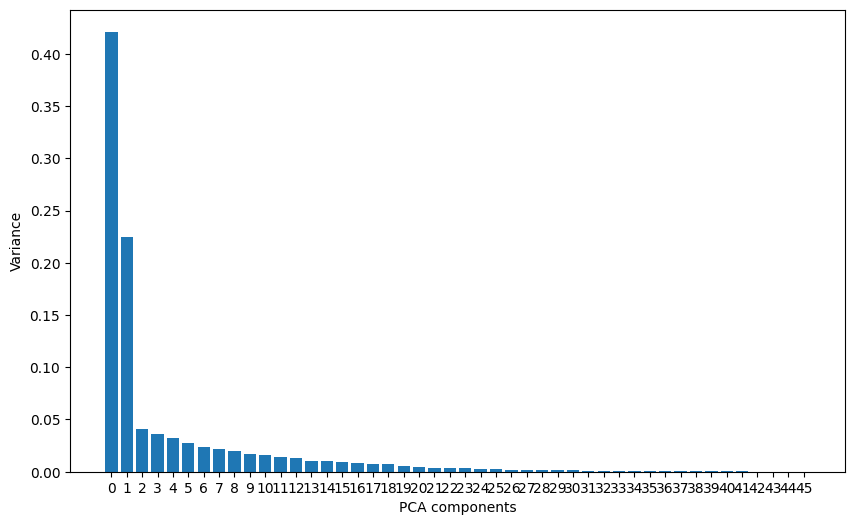

In [29]:
pcar = f.PCAReduction(unlabeled_scaled)

pcar.find_n()

#### Principal Component Analysis (PCA) Feature Selection  

From the PCA plot, it is evident that there is a significant decline in explained variance between the 0th and 1st components, as well as between the 1st and 2nd components. However, beyond the 2nd component, the decline in explained variance becomes negligible.  

Based on this observation, we will select **2 PCA features** for further analysis.  


In [30]:
pca_features = pcar.reduction(2)
pca_features_labeled = pcar.reduce_labeled(labeled_scaled)

In [31]:
pca_features_df = pd.DataFrame(pca_features, columns=['PCA 1', 'PCA 2'])
pca_features_labeled_df = pd.DataFrame(pca_features_labeled, columns=['PCA 1', 'PCA 2'])
pca_features_labeled_df['genre'] = labeled_features_df['genre']

### 3.2.1 Clustering with PCA

In [32]:
kmc_pca = f.KMeansClustering(pca_features, unlabeled_features_df)

clustered_df_pca = kmc_pca.create_kmeans(3)

In [33]:
pca_features_df['cluster'] = clustered_df_pca['cluster']

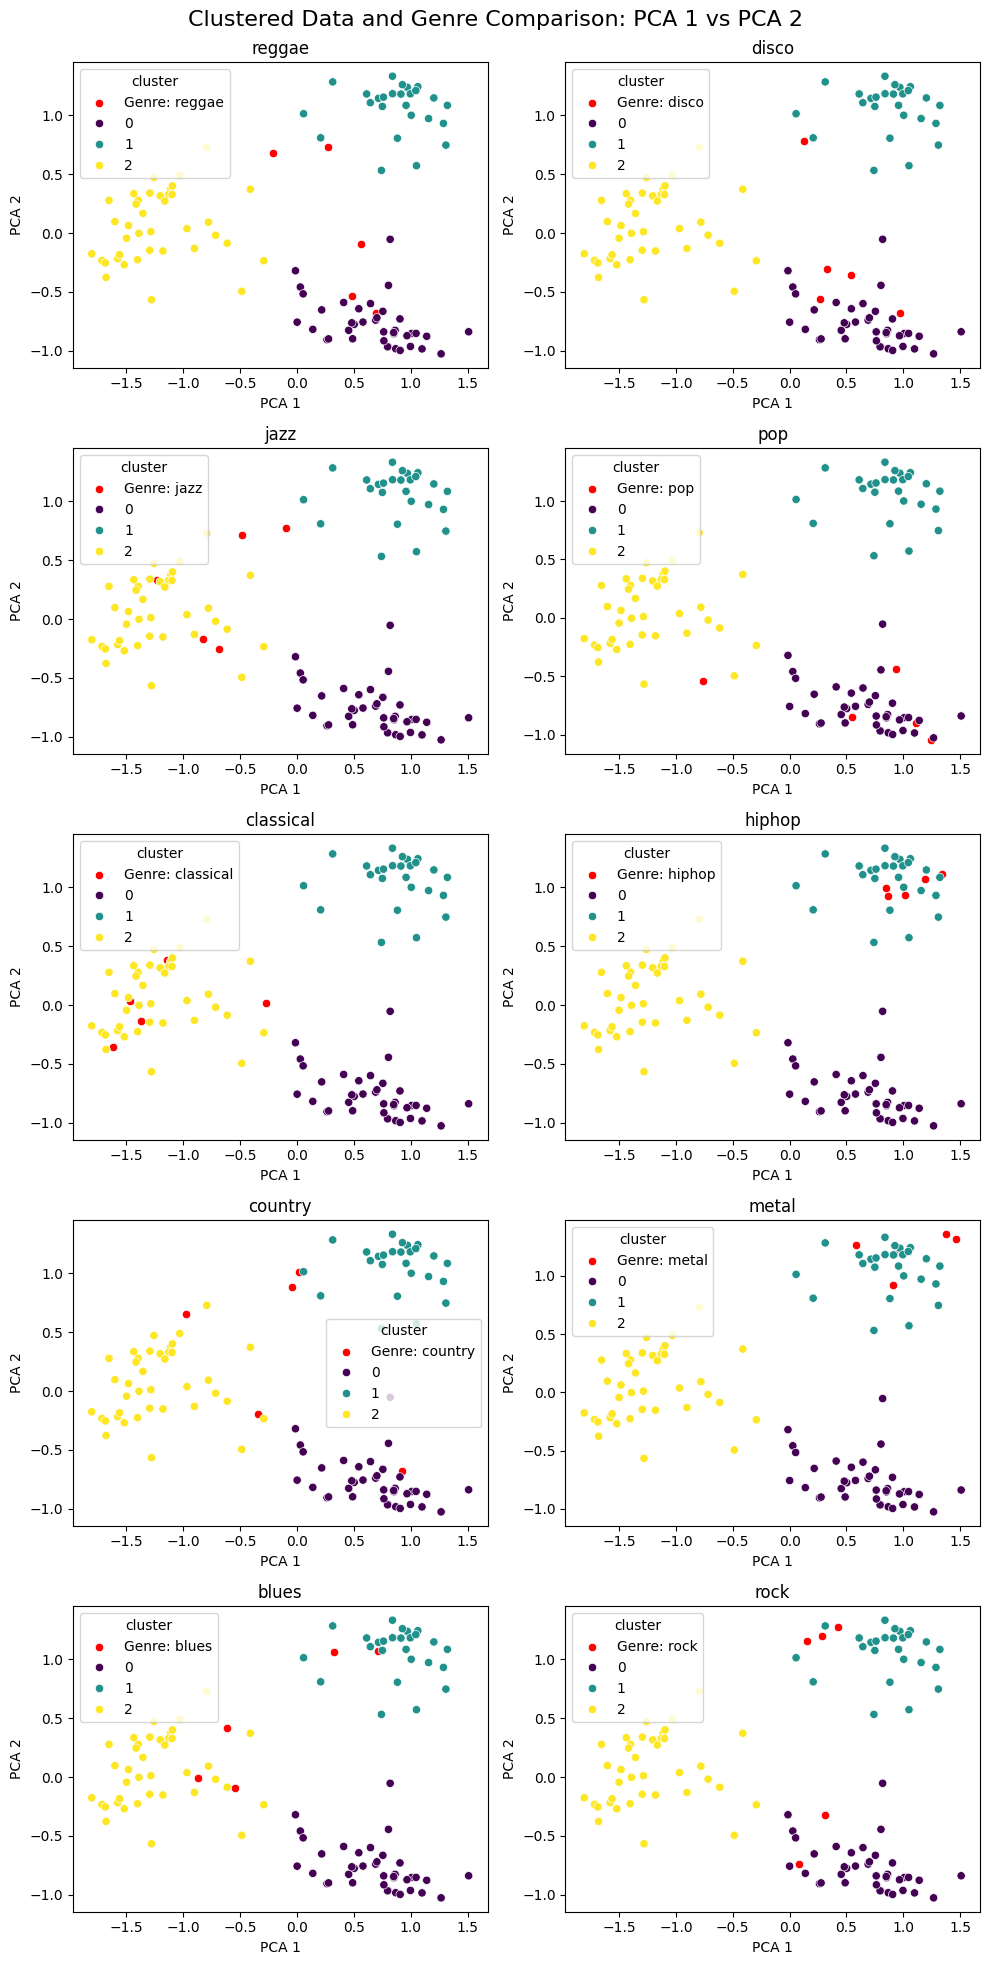

In [34]:
pcv = f.PostClusteringVisualizations(pca_features_df, pca_features_labeled_df)
pcv.scatter_plot('PCA 1', 'PCA 2')

#### PCA Results  

The PCA reduction has effectively created two features that distinctly separate the three clusters, as observed in the plot. This clear separation indicates that the two principal components are sufficient to capture the underlying structure of the data and distinguish between the clusters.


### 3.2.2 Determining genres

In [35]:
pd.crosstab(clustered_df_pca['cluster'], clustered_df['cluster'])

cluster,0,1,2
cluster,,,
0,39,0,0
1,0,26,0
2,0,0,40


#### Cluster Consistency  

From the crosstab, we can observe that the clusters are identical, with no differences between them. Therefore, we will apply the same cluster-to-genre mapping as we did for the standard KMeans clustering approach.


In [36]:
kmc_pca.cluster_to_genre(cluster_genre_mapping)

kmc_pca.create_submission()

### 3.2.3 Theory PCA

## 3.3 NMF

In [37]:
unlabeled_scaled

array([[1.0224809 , 1.        , 1.41576621, ..., 1.20499388, 1.41170697,
        1.        ],
       [1.50253228, 1.44930614, 1.35446236, ..., 1.6508848 , 1.2468231 ,
        1.07306396],
       [1.37243283, 1.3700634 , 1.7611666 , ..., 1.21348909, 1.53756744,
        1.0173272 ],
       ...,
       [1.97133762, 1.94327291, 1.09240817, ..., 1.15551086, 1.1703098 ,
        1.75115146],
       [1.08074034, 1.19315871, 1.76179115, ..., 1.63084215, 1.97222773,
        1.00125301],
       [1.16176455, 1.18045394, 1.77262479, ..., 1.53566176, 1.33479379,
        1.00347534]])

In [38]:
nmfr = f.NMFReduction(unlabeled_scaled)
df_nmf_unlabeled = nmfr.reduction()
df_nmf_labeled = nmfr.reduce_labeled(labeled_scaled)

In [39]:
df_nmf_labeled['genre'] = labeled_features_df['genre']

display(df_nmf_unlabeled.head())
display(df_nmf_labeled.head())

,0,1,2
0,0.589472,0.065917,0.805095
1,0.227249,0.862498,0.452168
2,0.613184,0.597203,0.517063
3,0.237683,0.852577,0.465424
4,0.245401,0.209728,0.946463


,0,1,2,genre
0,0.445185,0.651395,0.614407,reggae
1,0.333534,0.734341,0.591183,disco
2,0.658784,0.360846,0.660147,jazz
3,0.060566,0.160581,0.985163,pop
4,0.144280,0.215141,0.965866,disco


### 3.3.1 Clustering with NMF

In [40]:
kmc_nmf = f.KMeansClustering(df_nmf_unlabeled, unlabeled_features_df)

clustered_df_nmf = kmc_nmf.create_kmeans(3)

In [41]:
df_nmf_unlabeled['cluster'] = clustered_df_nmf['cluster']

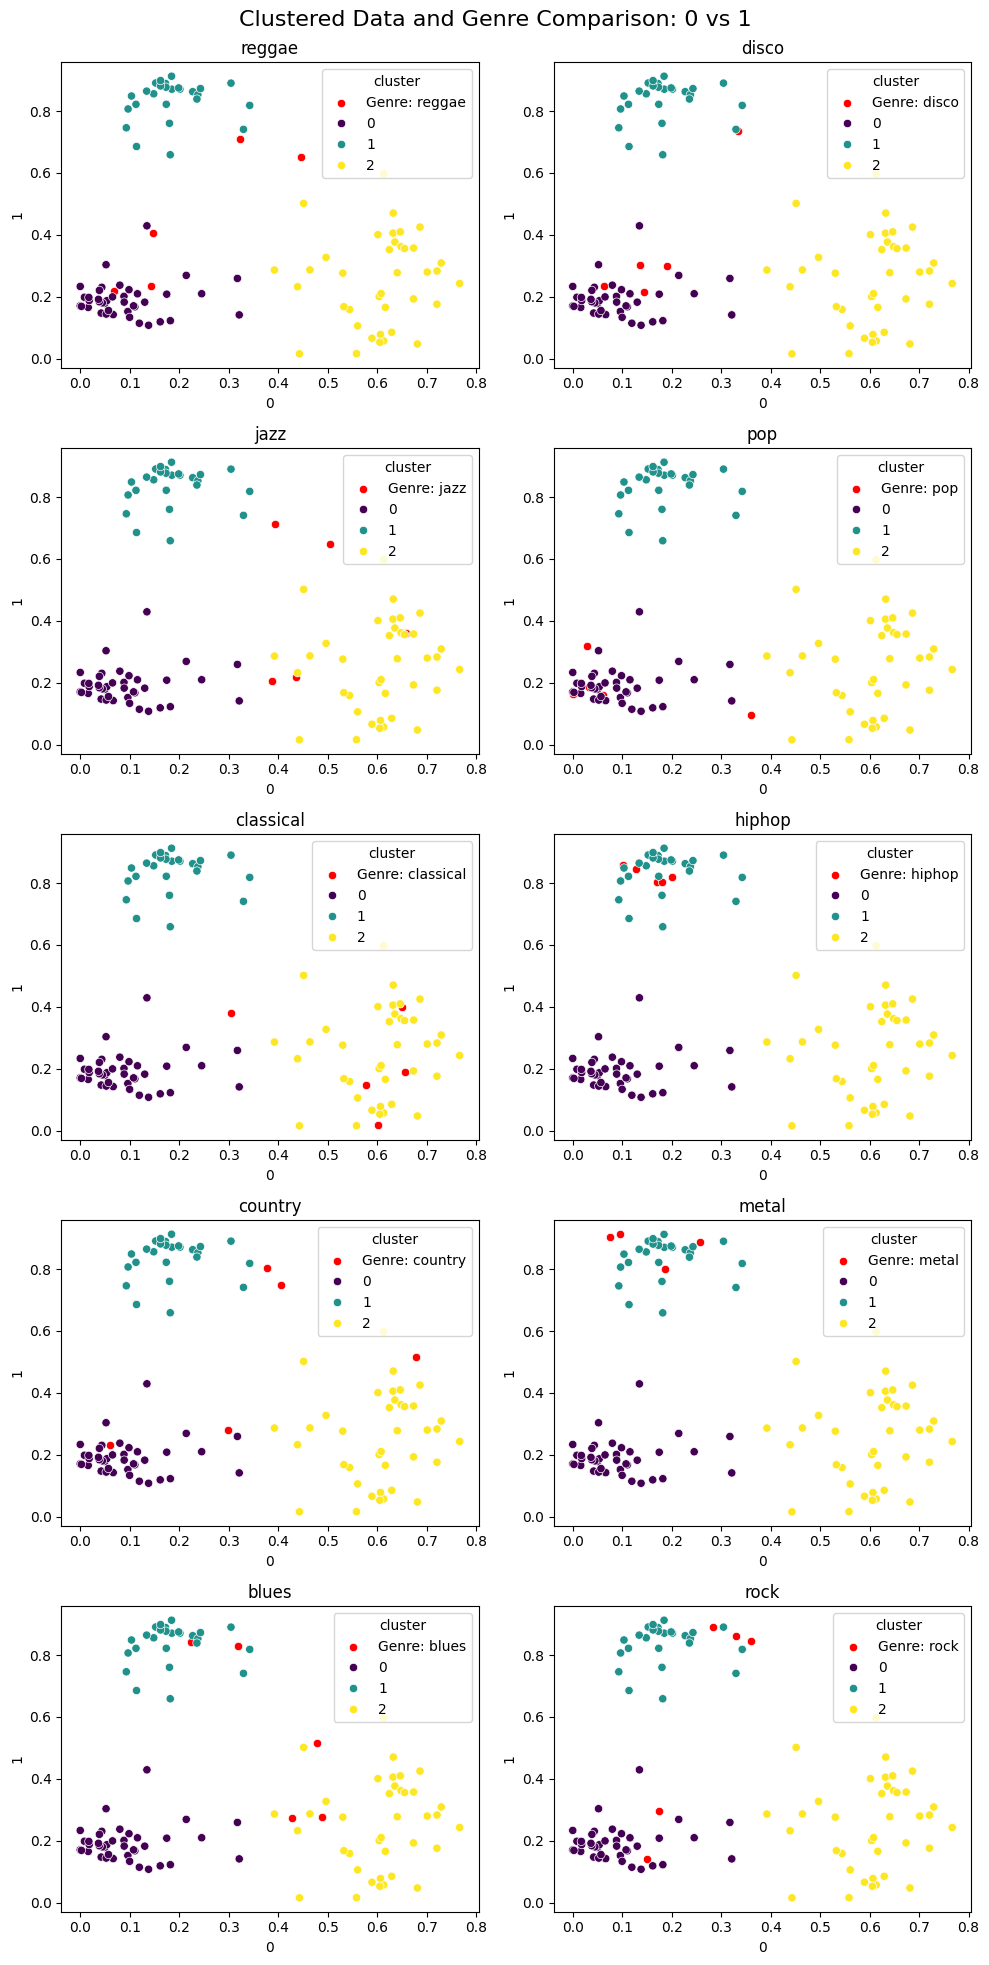

In [42]:
pcv = f.PostClusteringVisualizations(df_nmf_unlabeled, df_nmf_labeled)
pcv.scatter_plot(0, 1)

### 3.3.2 Determining genres

In [43]:
pd.crosstab(df_nmf_unlabeled['cluster'], clustered_df['cluster'])

cluster,0,1,2
cluster,,,
0,41,0,0
1,0,26,0
2,0,0,38


#### Cluster Consistency  

From the crosstab, we can observe that the clusters are identical, with no differences between them. Therefore, we will apply the same cluster-to-genre mapping as we did for the standard KMeans clustering approach.


In [44]:
kmc_pca.cluster_to_genre(cluster_genre_mapping)

kmc_pca.create_submission()

### 3.3.3 Theory NMF

## 3.4 Comparions of PCA and NMF

# 4. Conclusion

# 5. Sources

Librosa. (n.d.). Spectral centroid. Retrieved January 2, 2025, from https://librosa.org/doc-playground/0.7.2/generated/librosa.feature.spectral_centroid.html

Librosa. (n.d.). Spectral bandwidth. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html#id1

Librosa. (n.d.). Zero crossing rate. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.zero_crossing_rate.html

Librosa. (n.d.). Root-mean-square energy (RMS). Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.rms.html

Librosa. (n.d.). Spectral rolloff. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html

Librosa. (n.d.). Mel-frequency cepstral coefficients (MFCC). Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.mfcc.html

Librosa. (n.d.). Chroma short-time Fourier transform. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html

Librosa. (n.d.). Dynamic beat tracking. Retrieved January 2, 2025, from https://librosa.org/doc/main/auto_examples/plot_dynamic_beat.html

Librosa. (n.d.). Spectral contrast. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_contrast.html

Librosa. (n.d.). Tonnetz. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.tonnetz.html

Librosa. (n.d.). Spectral flatness. Retrieved January 2, 2025, from https://librosa.org/doc/main/generated/librosa.feature.spectral_flatness.html

Carrasco, O. C. (2019, June 3). *Gaussian mixture models explained: From intuition to implementation*. Towards Data Science. Retrieved from [https://towardsdatascience.com](https://towardsdatascience.com)

Wikipedia contributors. (n.d.). Spectral flatness. Wikipedia. Retrieved January 2, 2025, from https://en.wikipedia.org/wiki/Spectral_flatness

Dharmaraj. (2022, January 26). *The math behind K-means clustering*. Medium. Retrieved from [https://medium.com](https://medium.com)

Batra, R. (2022, February 11). *The math behind the K-means and hierarchical clustering algorithm!*. Medium. Retrieved from [https://medium.com](https://medium.com)